In [7]:
import pandas as pd
df = pd.read_csv('heart_2020_cleaned.csv')
#display(df)

Convert none numeric values to numeric values

In [8]:
binary_columns = [
        'HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke',
        'DiffWalking', 'PhysicalActivity', 'Asthma',
        'KidneyDisease', 'SkinCancer'
    ]
# Map Yes/No to 1/0
for column in binary_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})

# Sex mapping
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})

# Age Category mapping (ordered by age)
age_mapping = {
        '18-24': 0,
        '25-29': 1,
        '30-34': 2,
        '35-39': 3,
        '40-44': 4,
        '45-49': 5,
        '50-54': 6,
        '55-59': 7,
        '60-64': 8,
        '65-69': 9,
        '70-74': 10,
        '75-79': 11,
        '80 or older': 12
    }

df['AgeCategory'] = df['AgeCategory'].map(age_mapping)

# Race mapping
race_mapping = {
    'White': 0,
    'Black': 1,
    'Asian': 2,
    'American Indian/Alaskan Native': 3,
    'Hispanic': 4,
    'Other': 5
}
df['Race'] = df['Race'].map(race_mapping)

# Diabetic mapping
diabetic_mapping = {
    'No': 0,
    'No, borderline diabetes': 1,
    'Yes (during pregnancy)': 2,
    'Yes': 3
}
df['Diabetic'] = df['Diabetic'].map(diabetic_mapping)

# General Health mapping (ordered by health status)
genhealth_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Good': 2,
    'Very good': 3,
    'Excellent': 4
}
df['GenHealth'] = df['GenHealth'].map(genhealth_mapping)

#display(df)

Remove outliers values

In [11]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# df_clean = df.copy()
# # Calculate IQR and bounds for each numerical column
# for column in ['BMI', 'PhysicalHealth', 'MentalHealth']:
#     Q1 = df_clean[column].quantile(0.25)
#     Q3 = df_clean[column].quantile(0.75)
#     IQR = Q3 - Q1
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
#
#     df_clean = df_clean[(df_clean[column] >= lower_bound) & (df_clean[column] <= upper_bound)]


# Handle SleepTime separately with fixed bounds (3-16 hours)
df = df[(df['SleepTime'] >= 1) & (df['SleepTime'] <= 16)]

<Axes: >

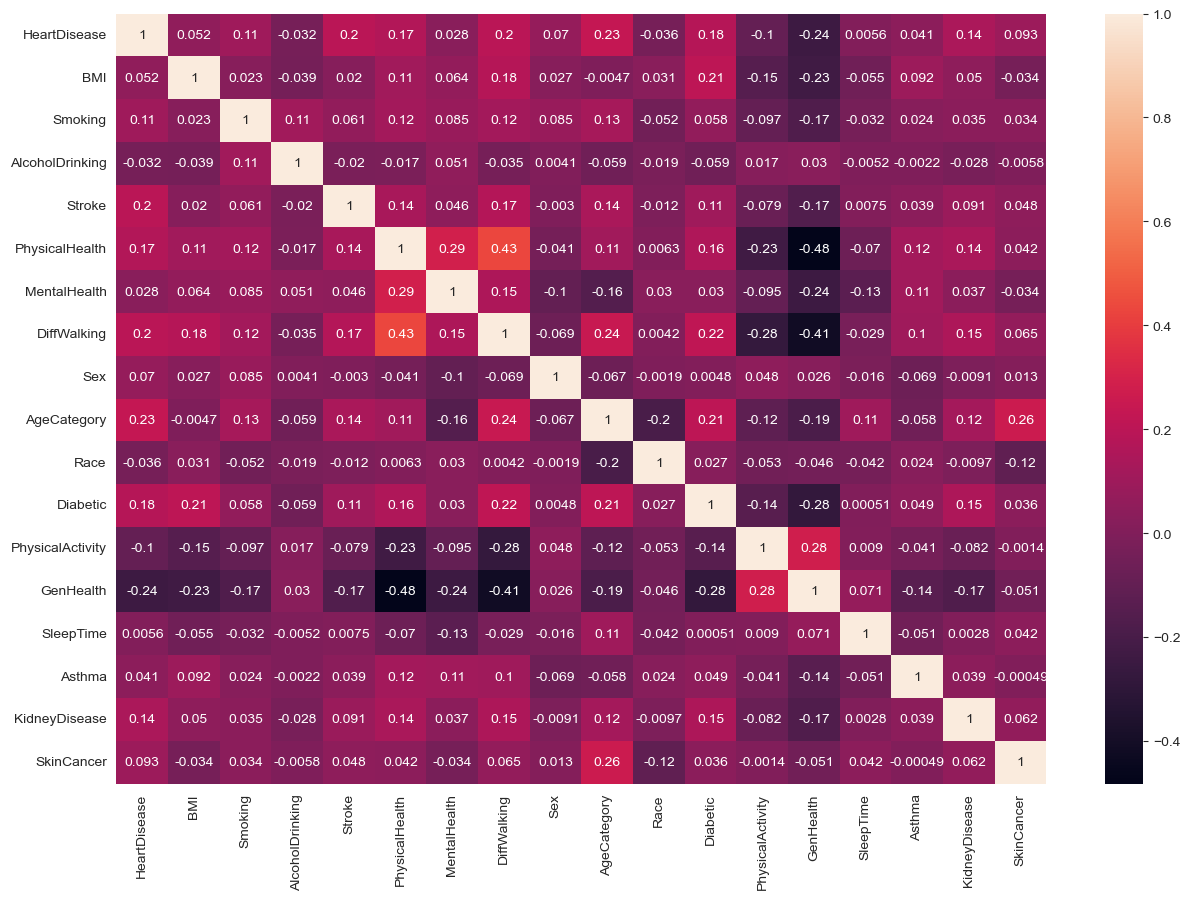

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)